# Tensorflow Convolutional Neural Network

Import tensorflow module, mnist dataset and matplotlib library for ploting learning history

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

Load MNIST data

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Initialize constant variables

In [3]:
K = 6
L = 12
M = 24
N = 200

**Initialize Variables and Placeholders**

Layer - 1

In [4]:
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))
B1 = tf.Variable(tf.ones([K]) / 10)

Layer - 2

In [5]:
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L]) / 10)

Layer - 3

In [6]:
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M]) / 10)

Layer - 4

In [7]:
W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N]) / 10)

Layer - 5

In [8]:
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

Define variables and graph for neural network mode

In [9]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding="SAME") + B1)
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, 2, 2, 1], padding="SAME") + B2)
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, 2, 2, 1], padding="SAME") + B3)

YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Y4_d = tf.nn.dropout(Y4, 0.75)
Ylogits = tf.matmul(Y4_d, W5) + B5
Y = tf.nn.softmax(Ylogits)

Placeholder for Y labels

In [10]:
Y_pred = tf.placeholder(tf.float32, [None, 10])

Define cross entropy [*loss function*]

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_pred)
cross_entropy = tf.reduce_mean(cross_entropy)

In [13]:
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Define Gradient Descent Optimizer

In [14]:
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(cross_entropy)

In [15]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [18]:
test_accuracy = []
test_cross = []
for i in range(2000):
    # Load batch
    batch_X, batch_Y = mnist.train.next_batch(100)
    batch_X = batch_X.reshape((100, 28, 28, 1))
    train_data = {X: batch_X, Y_pred: batch_Y}

    # Train
    sess.run(train_step, feed_dict=train_data)
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)

    test_batch_x = mnist.test.images
    test_batch_x = test_batch_x.reshape((10000, 28, 28, 1))
    test_data = {X: test_batch_x, Y_pred: mnist.test.labels}
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    print("Train data Accuracy: {}, Train data Cross Entropy: {}".format(a_train, c_train))
    print("Test data Accuracy: {}, Test data Cross Entropy: {}".format(a_test, c_test))

    # Append to list
    test_accuracy.append(a_test)
    test_cross.append(c_test)

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.278343141078949
Test data Accuracy: 0.9312000274658203, Test data Cross Entropy: 0.2380293905735016
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.27614182233810425
Test data Accuracy: 0.9301999807357788, Test data Cross Entropy: 0.23421025276184082
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.21169258654117584
Test data Accuracy: 0.929099977016449, Test data Cross Entropy: 0.2320062518119812
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.2178104817867279
Test data Accuracy: 0.930400013923645, Test data Cross Entropy: 0.23391477763652802
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.2330414205789566
Test data Accuracy: 0.9257000088691711, Test data Cross Entropy: 0.2375354915857315
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.16940677165985107
Test data Accuracy: 0.9283000230789185, Test data Cross Entropy

Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.19630664587020874
Test data Accuracy: 0.9304999709129333, Test data Cross Entropy: 0.2300516813993454
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.21516713500022888
Test data Accuracy: 0.9294000267982483, Test data Cross Entropy: 0.22911128401756287
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.18291689455509186
Test data Accuracy: 0.9315999746322632, Test data Cross Entropy: 0.22412744164466858
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.30494898557662964
Test data Accuracy: 0.9319999814033508, Test data Cross Entropy: 0.22923769056797028
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.33665043115615845
Test data Accuracy: 0.9319999814033508, Test data Cross Entropy: 0.22071416676044464
Train data Accuracy: 0.8700000047683716, Train data Cross Entropy: 0.3217032253742218
Test data Accuracy: 0.9296000003814697, Test data Cross

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.18610551953315735
Test data Accuracy: 0.9312000274658203, Test data Cross Entropy: 0.21956327557563782
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.23545251786708832
Test data Accuracy: 0.9350000023841858, Test data Cross Entropy: 0.21648462116718292
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.2856407165527344
Test data Accuracy: 0.9351000189781189, Test data Cross Entropy: 0.2184908241033554
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.19296729564666748
Test data Accuracy: 0.9323999881744385, Test data Cross Entropy: 0.21871240437030792
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.23523859679698944
Test data Accuracy: 0.9348999857902527, Test data Cross Entropy: 0.22185391187667847
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.2712787091732025
Test data Accuracy: 0.9359999895095825, Test data Cross En

Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.18558061122894287
Test data Accuracy: 0.9351000189781189, Test data Cross Entropy: 0.21597057580947876
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.1453458070755005
Test data Accuracy: 0.9319000244140625, Test data Cross Entropy: 0.21708495914936066
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.2397269457578659
Test data Accuracy: 0.9329000115394592, Test data Cross Entropy: 0.2146824449300766
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.20786914229393005
Test data Accuracy: 0.9343000054359436, Test data Cross Entropy: 0.21612100303173065
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.202272430062294
Test data Accuracy: 0.9366000294685364, Test data Cross Entropy: 0.21675875782966614
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.19718873500823975
Test data Accuracy: 0.9354000091552734, Test data Cross Entr

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.11080101877450943
Test data Accuracy: 0.9379000067710876, Test data Cross Entropy: 0.207968071103096
Train data Accuracy: 0.8899999856948853, Train data Cross Entropy: 0.436796098947525
Test data Accuracy: 0.9381999969482422, Test data Cross Entropy: 0.20429527759552002
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.19056974351406097
Test data Accuracy: 0.9376000165939331, Test data Cross Entropy: 0.2084493190050125
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.3460014760494232
Test data Accuracy: 0.9379000067710876, Test data Cross Entropy: 0.2089012712240219
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.22236572206020355
Test data Accuracy: 0.9394000172615051, Test data Cross Entropy: 0.20491638779640198
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.2836875021457672
Test data Accuracy: 0.9380999803543091, Test data Cross Entro

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1796720176935196
Test data Accuracy: 0.9380000233650208, Test data Cross Entropy: 0.2065950185060501
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.2000967264175415
Test data Accuracy: 0.9387999773025513, Test data Cross Entropy: 0.2046968787908554
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.2884124517440796
Test data Accuracy: 0.941100001335144, Test data Cross Entropy: 0.1988445371389389
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.1723153442144394
Test data Accuracy: 0.9369999766349792, Test data Cross Entropy: 0.20326955616474152
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.16610492765903473
Test data Accuracy: 0.9377999901771545, Test data Cross Entropy: 0.20105275511741638
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.22373662889003754
Test data Accuracy: 0.9391000270843506, Test data Cross Entropy:

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.16952072083950043
Test data Accuracy: 0.9394000172615051, Test data Cross Entropy: 0.19925358891487122
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.2335624247789383
Test data Accuracy: 0.9406999945640564, Test data Cross Entropy: 0.19521504640579224
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.11001794040203094
Test data Accuracy: 0.9431999921798706, Test data Cross Entropy: 0.19321419298648834
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.19460587203502655
Test data Accuracy: 0.9435999989509583, Test data Cross Entropy: 0.19613437354564667
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.2103179693222046
Test data Accuracy: 0.9394000172615051, Test data Cross Entropy: 0.20186108350753784
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.1941007822751999
Test data Accuracy: 0.9398999810218811, Test data Cross E

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.10101426392793655
Test data Accuracy: 0.939300000667572, Test data Cross Entropy: 0.19327117502689362
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.18302367627620697
Test data Accuracy: 0.9387999773025513, Test data Cross Entropy: 0.19474783539772034
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.20243635773658752
Test data Accuracy: 0.9409000277519226, Test data Cross Entropy: 0.19479769468307495
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.28111785650253296
Test data Accuracy: 0.9416000247001648, Test data Cross Entropy: 0.19172561168670654
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.3035757541656494
Test data Accuracy: 0.9423999786376953, Test data Cross Entropy: 0.19132842123508453
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.1568005532026291
Test data Accuracy: 0.9438999891281128, Test data Cross 

Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.2682309150695801
Test data Accuracy: 0.9430999755859375, Test data Cross Entropy: 0.18728354573249817
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.27051448822021484
Test data Accuracy: 0.9391999840736389, Test data Cross Entropy: 0.19346794486045837
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.1164788231253624
Test data Accuracy: 0.9452999830245972, Test data Cross Entropy: 0.18607237935066223
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.1590043604373932
Test data Accuracy: 0.9404000043869019, Test data Cross Entropy: 0.19187481701374054
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.13300931453704834
Test data Accuracy: 0.9431999921798706, Test data Cross Entropy: 0.1863415688276291
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.14103342592716217
Test data Accuracy: 0.9434000253677368, Test data Cross En

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.12889547646045685
Test data Accuracy: 0.9433000087738037, Test data Cross Entropy: 0.1793641746044159
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.23957706987857819
Test data Accuracy: 0.9437000155448914, Test data Cross Entropy: 0.1860213428735733
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.18835046887397766
Test data Accuracy: 0.9427000284194946, Test data Cross Entropy: 0.1846446692943573
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.09993011504411697
Test data Accuracy: 0.9430999755859375, Test data Cross Entropy: 0.18676623702049255
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.2633971869945526
Test data Accuracy: 0.9440000057220459, Test data Cross Entropy: 0.18564341962337494
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.26634252071380615
Test data Accuracy: 0.9437999725341797, Test data Cross Ent

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.15677136182785034
Test data Accuracy: 0.945900022983551, Test data Cross Entropy: 0.17862167954444885
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.15800872445106506
Test data Accuracy: 0.9447000026702881, Test data Cross Entropy: 0.17885661125183105
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.3316401541233063
Test data Accuracy: 0.9416999816894531, Test data Cross Entropy: 0.18009115755558014
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.16316446661949158
Test data Accuracy: 0.9417999982833862, Test data Cross Entropy: 0.18347200751304626
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.24669760465621948
Test data Accuracy: 0.946399986743927, Test data Cross Entropy: 0.17830407619476318
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1563698798418045
Test data Accuracy: 0.9434999823570251, Test data Cross En

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.07915609329938889
Test data Accuracy: 0.946399986743927, Test data Cross Entropy: 0.17455896735191345
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1676519811153412
Test data Accuracy: 0.9473999738693237, Test data Cross Entropy: 0.17519238591194153
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.10260091722011566
Test data Accuracy: 0.9460999965667725, Test data Cross Entropy: 0.17187027633190155
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1493794173002243
Test data Accuracy: 0.9456999897956848, Test data Cross Entropy: 0.17246149480342865
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.24167808890342712
Test data Accuracy: 0.9449999928474426, Test data Cross Entropy: 0.1747189164161682
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.22886024415493011
Test data Accuracy: 0.9474999904632568, Test data Cross Ent

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.07696603238582611
Test data Accuracy: 0.9462000131607056, Test data Cross Entropy: 0.1721387356519699
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.17622731626033783
Test data Accuracy: 0.9496999979019165, Test data Cross Entropy: 0.1708676666021347
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.18136738240718842
Test data Accuracy: 0.9496999979019165, Test data Cross Entropy: 0.16807156801223755
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.22254712879657745
Test data Accuracy: 0.9469000101089478, Test data Cross Entropy: 0.1716035157442093
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.21692466735839844
Test data Accuracy: 0.9516000151634216, Test data Cross Entropy: 0.16480174660682678
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.14675647020339966
Test data Accuracy: 0.9463000297546387, Test data Cross 

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.18400759994983673
Test data Accuracy: 0.9488000273704529, Test data Cross Entropy: 0.16832752525806427
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.14491605758666992
Test data Accuracy: 0.9501000046730042, Test data Cross Entropy: 0.16443535685539246
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.24319329857826233
Test data Accuracy: 0.9465000033378601, Test data Cross Entropy: 0.16695952415466309
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.14271530508995056
Test data Accuracy: 0.9513000249862671, Test data Cross Entropy: 0.16448183357715607
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.1420375108718872
Test data Accuracy: 0.9485999941825867, Test data Cross Entropy: 0.16941973567008972
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.11646876484155655
Test data Accuracy: 0.948199987411499, Test data Cross 

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.10126958787441254
Test data Accuracy: 0.9503999948501587, Test data Cross Entropy: 0.1606726050376892
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.14732162654399872
Test data Accuracy: 0.9502999782562256, Test data Cross Entropy: 0.1636873334646225
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.12269898504018784
Test data Accuracy: 0.9503999948501587, Test data Cross Entropy: 0.16336803138256073
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.23273494839668274
Test data Accuracy: 0.9498000144958496, Test data Cross Entropy: 0.1647823303937912
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.29244571924209595
Test data Accuracy: 0.9501000046730042, Test data Cross Entropy: 0.16404956579208374
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.13110700249671936
Test data Accuracy: 0.9517999887466431, Test data Cross 

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1187829002737999
Test data Accuracy: 0.9517999887466431, Test data Cross Entropy: 0.1602333039045334
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.15772821009159088
Test data Accuracy: 0.9502000212669373, Test data Cross Entropy: 0.1635463535785675
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.20865827798843384
Test data Accuracy: 0.951200008392334, Test data Cross Entropy: 0.1596837043762207
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.0658591166138649
Test data Accuracy: 0.9521999955177307, Test data Cross Entropy: 0.1628311276435852
Train data Accuracy: 0.8999999761581421, Train data Cross Entropy: 0.3486994206905365
Test data Accuracy: 0.95169997215271, Test data Cross Entropy: 0.15883779525756836
Train data Accuracy: 0.8899999856948853, Train data Cross Entropy: 0.33989542722702026
Test data Accuracy: 0.9506999850273132, Test data Cross Entropy

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.09485495835542679
Test data Accuracy: 0.9531000256538391, Test data Cross Entropy: 0.16198918223381042
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.11117440462112427
Test data Accuracy: 0.9506000280380249, Test data Cross Entropy: 0.16194014251232147
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.195638507604599
Test data Accuracy: 0.9519000053405762, Test data Cross Entropy: 0.16156086325645447
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.15551051497459412
Test data Accuracy: 0.9519000053405762, Test data Cross Entropy: 0.15888653695583344
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.19864177703857422
Test data Accuracy: 0.9467999935150146, Test data Cross Entropy: 0.1672738492488861
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.15155255794525146
Test data Accuracy: 0.9517999887466431, Test data Cross 

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.1439843773841858
Test data Accuracy: 0.9520999789237976, Test data Cross Entropy: 0.15593726933002472
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.19860835373401642
Test data Accuracy: 0.9510999917984009, Test data Cross Entropy: 0.1594254970550537
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.1139969453215599
Test data Accuracy: 0.9523000121116638, Test data Cross Entropy: 0.1605324149131775
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.21860815584659576
Test data Accuracy: 0.9491000175476074, Test data Cross Entropy: 0.1583191454410553
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1730436533689499
Test data Accuracy: 0.9498000144958496, Test data Cross Entropy: 0.15985634922981262
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1432444155216217
Test data Accuracy: 0.951200008392334, Test data Cross Entrop

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.14452272653579712
Test data Accuracy: 0.95660001039505, Test data Cross Entropy: 0.14850690960884094
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.08921694755554199
Test data Accuracy: 0.9514999985694885, Test data Cross Entropy: 0.1537550985813141
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.2071719765663147
Test data Accuracy: 0.9544000029563904, Test data Cross Entropy: 0.14875540137290955
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.11404415220022202
Test data Accuracy: 0.954800009727478, Test data Cross Entropy: 0.14905306696891785
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.12529337406158447
Test data Accuracy: 0.954800009727478, Test data Cross Entropy: 0.15089496970176697
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.14972999691963196
Test data Accuracy: 0.9542999863624573, Test data Cross Entro

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.20865236222743988
Test data Accuracy: 0.9562000036239624, Test data Cross Entropy: 0.14569278061389923
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.16844268143177032
Test data Accuracy: 0.9524000287055969, Test data Cross Entropy: 0.14902755618095398
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.11632417887449265
Test data Accuracy: 0.9520999789237976, Test data Cross Entropy: 0.1509765088558197
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.12354521453380585
Test data Accuracy: 0.9521999955177307, Test data Cross Entropy: 0.1473167985677719
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.10251989960670471
Test data Accuracy: 0.9546999931335449, Test data Cross Entropy: 0.14730839431285858
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.1434272825717926
Test data Accuracy: 0.9545000195503235, Test data Cross E

Train data Accuracy: 1.0, Train data Cross Entropy: 0.05715177580714226
Test data Accuracy: 0.9552000164985657, Test data Cross Entropy: 0.14802972972393036
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.15761427581310272
Test data Accuracy: 0.9563999772071838, Test data Cross Entropy: 0.14618483185768127
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.19826146960258484
Test data Accuracy: 0.9550999999046326, Test data Cross Entropy: 0.14907754957675934
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1660037785768509
Test data Accuracy: 0.9545999765396118, Test data Cross Entropy: 0.15002694725990295
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.09167554974555969
Test data Accuracy: 0.9539999961853027, Test data Cross Entropy: 0.1475444734096527
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1382015347480774
Test data Accuracy: 0.9550999999046326, Test data Cross Entropy: 0.146901

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.11920762807130814
Test data Accuracy: 0.9563999772071838, Test data Cross Entropy: 0.1423341929912567
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.2271343171596527
Test data Accuracy: 0.9556999802589417, Test data Cross Entropy: 0.1473667472600937
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1665390431880951
Test data Accuracy: 0.9567000269889832, Test data Cross Entropy: 0.14381274580955505
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.14372268319129944
Test data Accuracy: 0.9564999938011169, Test data Cross Entropy: 0.14324206113815308
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.1886482834815979
Test data Accuracy: 0.9553999900817871, Test data Cross Entropy: 0.1446169912815094
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.17902585864067078
Test data Accuracy: 0.9567999839782715, Test data Cross Ent

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.12653130292892456
Test data Accuracy: 0.95660001039505, Test data Cross Entropy: 0.14346656203269958
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.21063953638076782
Test data Accuracy: 0.95660001039505, Test data Cross Entropy: 0.14143699407577515
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.20160888135433197
Test data Accuracy: 0.9564999938011169, Test data Cross Entropy: 0.14283718168735504
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.1076163798570633
Test data Accuracy: 0.9581000208854675, Test data Cross Entropy: 0.13980986177921295
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.2171669900417328
Test data Accuracy: 0.957099974155426, Test data Cross Entropy: 0.13757111132144928
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.14545296132564545
Test data Accuracy: 0.9555000066757202, Test data Cross Entro

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1747720092535019
Test data Accuracy: 0.957099974155426, Test data Cross Entropy: 0.14232154190540314
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.0834135040640831
Test data Accuracy: 0.9556999802589417, Test data Cross Entropy: 0.1399804949760437
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.20970039069652557
Test data Accuracy: 0.9580000042915344, Test data Cross Entropy: 0.1378389298915863
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.17520467936992645
Test data Accuracy: 0.9585000276565552, Test data Cross Entropy: 0.13929057121276855
Train data Accuracy: 0.9200000166893005, Train data Cross Entropy: 0.20389558374881744
Test data Accuracy: 0.9598000049591064, Test data Cross Entropy: 0.13892154395580292
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.09395080804824829
Test data Accuracy: 0.958299994468689, Test data Cross Ent

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1124224066734314
Test data Accuracy: 0.9560999870300293, Test data Cross Entropy: 0.13838592171669006
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.22610948979854584
Test data Accuracy: 0.9577000141143799, Test data Cross Entropy: 0.13662250339984894
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.15390537679195404
Test data Accuracy: 0.9596999883651733, Test data Cross Entropy: 0.13231730461120605
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.20503896474838257
Test data Accuracy: 0.9577999711036682, Test data Cross Entropy: 0.13652953505516052
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.19348537921905518
Test data Accuracy: 0.957099974155426, Test data Cross Entropy: 0.13456960022449493
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.11453547328710556
Test data Accuracy: 0.9560999870300293, Test data Cross 

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.12004286795854568
Test data Accuracy: 0.9589999914169312, Test data Cross Entropy: 0.13370385766029358
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.14693549275398254
Test data Accuracy: 0.958299994468689, Test data Cross Entropy: 0.1344541758298874
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.25369420647621155
Test data Accuracy: 0.9570000171661377, Test data Cross Entropy: 0.13812634348869324
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.13831132650375366
Test data Accuracy: 0.9578999876976013, Test data Cross Entropy: 0.14123643934726715
Train data Accuracy: 0.8899999856948853, Train data Cross Entropy: 0.24512916803359985
Test data Accuracy: 0.958899974822998, Test data Cross Entropy: 0.13682176172733307
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.16964265704154968
Test data Accuracy: 0.9595000147819519, Test data Cross 

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1709100306034088
Test data Accuracy: 0.9581999778747559, Test data Cross Entropy: 0.1345544457435608
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1268273890018463
Test data Accuracy: 0.9598000049591064, Test data Cross Entropy: 0.13416270911693573
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.06398004293441772
Test data Accuracy: 0.9589999914169312, Test data Cross Entropy: 0.13556519150733948
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.16662420332431793
Test data Accuracy: 0.9581999778747559, Test data Cross Entropy: 0.13450586795806885
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.15677610039710999
Test data Accuracy: 0.9603999853134155, Test data Cross Entropy: 0.13148805499076843
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.17606686055660248
Test data Accuracy: 0.9591000080108643, Test data Cross E

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.13450990617275238
Test data Accuracy: 0.9599000215530396, Test data Cross Entropy: 0.1296929270029068
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.15308499336242676
Test data Accuracy: 0.9588000178337097, Test data Cross Entropy: 0.12836723029613495
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1493639051914215
Test data Accuracy: 0.9588000178337097, Test data Cross Entropy: 0.13119098544120789
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.2152908891439438
Test data Accuracy: 0.9598000049591064, Test data Cross Entropy: 0.12939341366291046
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1669028103351593
Test data Accuracy: 0.9606000185012817, Test data Cross Entropy: 0.13431856036186218
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.08257899433374405
Test data Accuracy: 0.9591000080108643, Test data Cross Ent

Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.21033057570457458
Test data Accuracy: 0.9592000246047974, Test data Cross Entropy: 0.13091900944709778
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.13904060423374176
Test data Accuracy: 0.9588000178337097, Test data Cross Entropy: 0.13033531606197357
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.11709395051002502
Test data Accuracy: 0.9595999717712402, Test data Cross Entropy: 0.1273355782032013
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.12510722875595093
Test data Accuracy: 0.9610999822616577, Test data Cross Entropy: 0.13017185032367706
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.16088227927684784
Test data Accuracy: 0.9610000252723694, Test data Cross Entropy: 0.12791703641414642
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.15864986181259155
Test data Accuracy: 0.9609000086784363, Test data Cross

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.10095065832138062
Test data Accuracy: 0.9634000062942505, Test data Cross Entropy: 0.12336159497499466
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.13625477254390717
Test data Accuracy: 0.9599000215530396, Test data Cross Entropy: 0.12724106013774872
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.06274578720331192
Test data Accuracy: 0.9580000042915344, Test data Cross Entropy: 0.12949036061763763
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03584599494934082
Test data Accuracy: 0.9603000283241272, Test data Cross Entropy: 0.12386111170053482
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.07853910326957703
Test data Accuracy: 0.9614999890327454, Test data Cross Entropy: 0.12740136682987213
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.07840333133935928
Test data Accuracy: 0.9596999883651733, Test data Cross Entropy: 0.1

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.14735548198223114
Test data Accuracy: 0.9624000191688538, Test data Cross Entropy: 0.1242290511727333
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.14220328629016876
Test data Accuracy: 0.9616000056266785, Test data Cross Entropy: 0.12523391842842102
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.13180872797966003
Test data Accuracy: 0.9628999829292297, Test data Cross Entropy: 0.12464786320924759
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.104560486972332
Test data Accuracy: 0.9624999761581421, Test data Cross Entropy: 0.12236008048057556
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1621018946170807
Test data Accuracy: 0.9632999897003174, Test data Cross Entropy: 0.12062187492847443
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.1285279542207718
Test data Accuracy: 0.9634000062942505, Test data Cross Ent

Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.17624980211257935
Test data Accuracy: 0.9627000093460083, Test data Cross Entropy: 0.12204061448574066
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.16928885877132416
Test data Accuracy: 0.9643999934196472, Test data Cross Entropy: 0.11928950250148773
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1528017669916153
Test data Accuracy: 0.960099995136261, Test data Cross Entropy: 0.12638962268829346
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.17029601335525513
Test data Accuracy: 0.9620000123977661, Test data Cross Entropy: 0.12355058640241623
Train data Accuracy: 1.0, Train data Cross Entropy: 0.05613676458597183
Test data Accuracy: 0.9621999859809875, Test data Cross Entropy: 0.12335920333862305
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.16690583527088165
Test data Accuracy: 0.9625999927520752, Test data Cross Entropy: 0.1210

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.061654578894376755
Test data Accuracy: 0.9607999920845032, Test data Cross Entropy: 0.12225816398859024
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.060891419649124146
Test data Accuracy: 0.9631999731063843, Test data Cross Entropy: 0.12037637084722519
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.15889915823936462
Test data Accuracy: 0.9621000289916992, Test data Cross Entropy: 0.11746430397033691
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.105827197432518
Test data Accuracy: 0.9607999920845032, Test data Cross Entropy: 0.11898268759250641
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.10898365080356598
Test data Accuracy: 0.9635999798774719, Test data Cross Entropy: 0.11831188946962357
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.12527495622634888
Test data Accuracy: 0.963100016117096, Test data Cross

Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.06798072159290314
Test data Accuracy: 0.9653000235557556, Test data Cross Entropy: 0.111419178545475
Train data Accuracy: 1.0, Train data Cross Entropy: 0.04244811087846756
Test data Accuracy: 0.965399980545044, Test data Cross Entropy: 0.11546874791383743
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.09323127567768097
Test data Accuracy: 0.963699996471405, Test data Cross Entropy: 0.11852549016475677
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.07373844087123871
Test data Accuracy: 0.9646999835968018, Test data Cross Entropy: 0.11534493416547775
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.11388948559761047
Test data Accuracy: 0.9646999835968018, Test data Cross Entropy: 0.11829029768705368
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.0690634548664093
Test data Accuracy: 0.9641000032424927, Test data Cross Entropy: 0.118045

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1606806367635727
Test data Accuracy: 0.9656999707221985, Test data Cross Entropy: 0.11701667308807373
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.10482747107744217
Test data Accuracy: 0.9631999731063843, Test data Cross Entropy: 0.11621196568012238
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.10035667568445206
Test data Accuracy: 0.9660999774932861, Test data Cross Entropy: 0.11262277513742447
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.18111179769039154
Test data Accuracy: 0.9656999707221985, Test data Cross Entropy: 0.11458157002925873
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.18565477430820465
Test data Accuracy: 0.9653000235557556, Test data Cross Entropy: 0.11631950736045837
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.11340358853340149
Test data Accuracy: 0.9642000198364258, Test data Cross 

Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.10364404320716858
Test data Accuracy: 0.9649999737739563, Test data Cross Entropy: 0.11532409489154816
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.09993185847997665
Test data Accuracy: 0.963699996471405, Test data Cross Entropy: 0.11524347960948944
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.09981895238161087
Test data Accuracy: 0.9638000130653381, Test data Cross Entropy: 0.11632763594388962
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.1213645488023758
Test data Accuracy: 0.9606000185012817, Test data Cross Entropy: 0.12061091512441635
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.07107720524072647
Test data Accuracy: 0.9628000259399414, Test data Cross Entropy: 0.1169002428650856
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.11436887085437775
Test data Accuracy: 0.9639000296592712, Test data Cross E

Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1059572622179985
Test data Accuracy: 0.9645000100135803, Test data Cross Entropy: 0.11109140515327454
Train data Accuracy: 0.9300000071525574, Train data Cross Entropy: 0.2783544361591339
Test data Accuracy: 0.9648000001907349, Test data Cross Entropy: 0.11617100983858109
Train data Accuracy: 0.9399999976158142, Train data Cross Entropy: 0.1489752233028412
Test data Accuracy: 0.9661999940872192, Test data Cross Entropy: 0.11014106124639511
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.13010121881961823
Test data Accuracy: 0.9652000069618225, Test data Cross Entropy: 0.11214391887187958
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.12516289949417114
Test data Accuracy: 0.9638000130653381, Test data Cross Entropy: 0.11113566905260086
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.06928648799657822
Test data Accuracy: 0.9653000235557556, Test data Cross En

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.09579911828041077
Test data Accuracy: 0.965499997138977, Test data Cross Entropy: 0.11318141967058182
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.12036184221506119
Test data Accuracy: 0.9663000106811523, Test data Cross Entropy: 0.10858077555894852
Train data Accuracy: 1.0, Train data Cross Entropy: 0.03921957314014435
Test data Accuracy: 0.9635000228881836, Test data Cross Entropy: 0.11688243597745895
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.11085452884435654
Test data Accuracy: 0.9642000198364258, Test data Cross Entropy: 0.1175294890999794
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.1402038186788559
Test data Accuracy: 0.9646000266075134, Test data Cross Entropy: 0.11276030540466309
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.17334295809268951
Test data Accuracy: 0.9639999866485596, Test data Cross Entropy: 0.117668

Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.09974221885204315
Test data Accuracy: 0.9663000106811523, Test data Cross Entropy: 0.11037275195121765
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.10147803276777267
Test data Accuracy: 0.9663000106811523, Test data Cross Entropy: 0.11056799441576004
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.10045847296714783
Test data Accuracy: 0.9661999940872192, Test data Cross Entropy: 0.11021310836076736
Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.11577557772397995
Test data Accuracy: 0.9656999707221985, Test data Cross Entropy: 0.11114616692066193
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.14517807960510254
Test data Accuracy: 0.9664000272750854, Test data Cross Entropy: 0.10684400796890259
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.08728417754173279
Test data Accuracy: 0.9638000130653381, Test data Cros

Train data Accuracy: 0.9599999785423279, Train data Cross Entropy: 0.10715118050575256
Test data Accuracy: 0.9652000069618225, Test data Cross Entropy: 0.11491639167070389
Train data Accuracy: 0.9100000262260437, Train data Cross Entropy: 0.24892234802246094
Test data Accuracy: 0.9663000106811523, Test data Cross Entropy: 0.10908598452806473
Train data Accuracy: 0.9700000286102295, Train data Cross Entropy: 0.10616262257099152
Test data Accuracy: 0.9642999768257141, Test data Cross Entropy: 0.11336440593004227
Train data Accuracy: 0.9800000190734863, Train data Cross Entropy: 0.062466979026794434
Test data Accuracy: 0.9642999768257141, Test data Cross Entropy: 0.11134456843137741
Train data Accuracy: 0.9900000095367432, Train data Cross Entropy: 0.04092113673686981
Test data Accuracy: 0.9672999978065491, Test data Cross Entropy: 0.1076357439160347
Train data Accuracy: 0.949999988079071, Train data Cross Entropy: 0.19700269401073456
Test data Accuracy: 0.9666000008583069, Test data Cros

In [19]:
print("Last Accuracy: {}, Maximum Accuracy: {}".format(test_accuracy[-1], np.max(test_accuracy)))

Last Accuracy: 0.9664999842643738, Maximum Accuracy: 0.9679999947547913


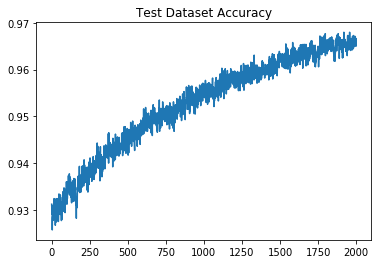

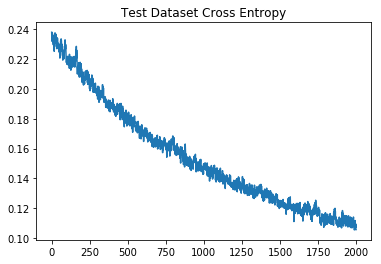

In [20]:
plt.figure()
plt.title("Test Dataset Accuracy")
plt.plot(test_accuracy)
plt.figure()
plt.title("Test Dataset Cross Entropy")
plt.plot(test_cross)
plt.show()